# Chapter 02 자연어와 단어의 분산 표현

자연어 처리가 다루는 분야는 다양하지만, 그 본질적 문제는 컴퓨터가 우리의 말을 알아듣게(이해하게) 만드는 것이다. 이번 장은 컴퓨터에 말을 이해시킨다는 것이 무슨 뜻인지, 그리고 어떤 방법들이 존재하는지를 중심으로 진행한다. 특히 고전적인 기법(딥러닝 등장 이전의 기법)들을 자세히 살펴보고자 한다.

또한 이번 장에서는 파이썬으로 텍스트를 다루는 연습도 겸한다. 텍스트를 단어로 분할하는 처리나 단어를 단어 ID로 변환하는 처리 등을 구현한다.

## 2.1 자연어 처리란

- $\textbf{자연어}^{\text{natural language}}$ : 한국어와 영어 등 우리가 평소에 쓰는 말. '부드러운 언어'
- $\textbf{자연어 처리}^{\text{Natural Language Processing}}$ : 자연어를 처리하는 분야 $\rightarrow$ 우리의 말을 컴퓨터에게 이해시키기 위한 기술(분야)
- 프로그래밍 언어 : 컴퓨터가 이해할 수 있는 언어. 정해진 문법에 따라 컴퓨터가 코드를 해석. '딱딱한 언어'

### 2.1.1 단어의 의미

말은 '문자'로 구성되며, 말의 의미는 '단어'로 구성됨. 즉 단어는 의미의 최소 단위가 되며, 자연어를 컴퓨터에게 이해시키기 위해 '단어의 의미'를 이해시키는게 중요.

'단어의 의미'를 잘 팍악하는 표현 방법 : 시소러스를 활용한 기법, 통계 기반 기법, 추론 기반 기법(word2vec)


- 시소러스(thesaurus) : 사람의 손으로 만든 유의어 사전
- 통계 기반 기법 : 통계 정보로부터 단어를 표현하는 기법
- word2vec : 신경망을 활용한 '추론 기반' 기법

## 2.2 시소러스

'단어의 의미'를 나타내는 가장 일반적인 방법 : 사람이 직접 단어의 의미를 정의하는 방식

자연어 처리의 역사를 돌이켜보면, 초기에는 주로 $\textbf{시소러스}^{\text{thesaurus}}$형태의 사전을 활용해왔음.

시소러스란 유의어 사전으로, '뜻이 같은 단어(동의어)'나 '뜻이 비슷한 단어(유의어)'가 한 그룹으로 분류되어 있음.

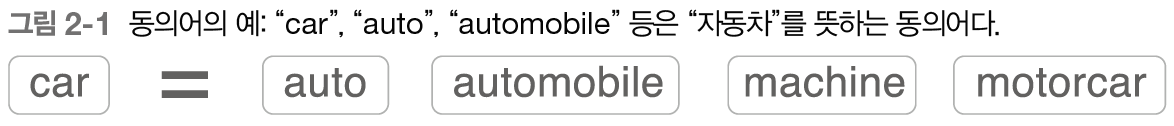

In [1]:
from PIL import Image

Image.open('C:\\Users\\AAA\\self_study\\deep_learning_from_scratch\\book_2\\images\\fig 2-1.png')

자연어 처리에 이용되는 시소러스에서는 단어 사이의 '상위와 하위' 혹은 '전체와 부분'등, 더 디테일한 관계까지 정의해둔 경우가 있음. 다음 그림의 경우 각 단어의 관계를 그래프 구조로 정의함.

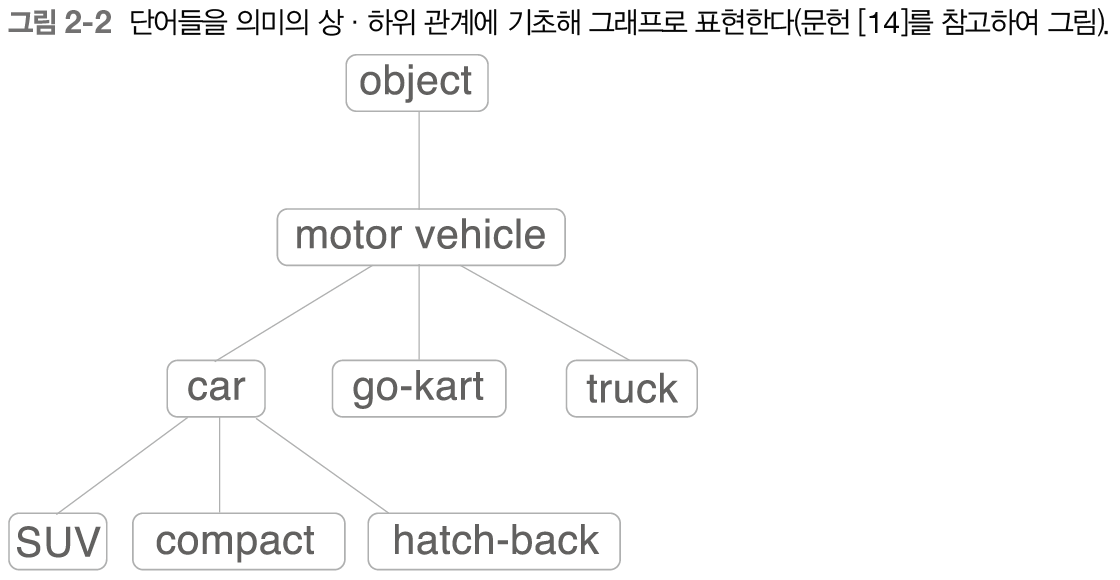

In [2]:
Image.open('C:\\Users\\AAA\\self_study\\deep_learning_from_scratch\\book_2\\images\\fig 2-2.png')

이와 같이 모든 단어에 대한 유의어 집합을 만든 다음, 단어들의 관계를 그래프로 표현해서 단어 사이의 연결을 정의할 수 있음.

그러면 이러한 '단어 네트워크'를 이용하여 컴퓨터에게 단어 사이의 관계를 가르칠 수 있음.

### 2.2.1 WordNet

자연어 처리 분야에서 가장 유명한 시소러스는 $\textbf{WordNet}$이다.

WordNet은 프린스턴 대학교에서 1985년부터 구축하기 시작한 전통 있는 시소러스로, 지금까지 많은 연구와 다양한 자연어 처리 어플리케이션에서 활용되고 있다.

WordNet을 사용하면 유의어를 얻거나 '단어 네트워크'를 이용할 수 있다. 또한 단어 네트워크를 사용해서 단어 사이의 유사도를 구할 수도 있다.

### 2.2.2 시소러스의 문제점

WordNet과 같은 시소러스에는 수많은 단어에 대한 동의어와 계층 구조 등의 관계가 정의되어 있다.

이러한 지식을 이용하면 '단어의 의미'를 간접적으로라도 컴퓨터에 전달할 수 있다.

하지만 이와 같은 사람이 수작업으로 일일이 레이블링하는 방식에는 크나큰 단점이 존재한다.

1. $\textbf{시대 변화에 대응하기 어렵다.}$

2. $\textbf{사람을 쓰는 비용은 크다.}$

3. $\textbf{단어의 미묘한 차이를 표현할 수 없다.}$

이와 같이 시소러스를 사용하는 기법(단어의 의미를 사람이 정의하는 기법)에는 커다란 문제가 있다. 

이 문제를 피하기 위해, '통계 기반 기법'과 신경망을 사용하는 '추론 기반 기법'에 대해 알아보고자 한다.

두 기법에서는 대량의 텍스트 데이터로부터 '단어의 의미'를 자동으로 추출한다.

## 2.3 통계 기반 기법

$\textbf{말뭉치}^{\text{corpus}}$ : 대량의 텍스트 데이터. 주로 자연어 처리 연구나 어플리케이션을 염두에 두고 수집된 데이터를 의미.

말뭉치에는 문장을 쓰는 방법, 단어를 쓰는 방법, 단어의 의미 등 사람이 알고 있는 자연어에 대한 지식이 포함되어 있음.

통계 기반 기법의 목표는 사람의 지식으로 가득한 말뭉치에서 자동으로, 그리고 효율적으로 그 핵심을 추출하는 것.

### 2.3.1 파이썬으로 말뭉치 전처리하기

파이썬의 대화 모드를 활용한 매우 작은 텍스트 데이터(말뭉치)에 전처리(preprocessing)하기

(여기서 전처리란 텍스트 데이터를 단어로 분할하고 그 분할된 단어들을 단어 ID 목록으로 변환하는 일)

In [3]:
text = "You say goodbye and I say hello."

In [4]:
text = text.lower()
text = text.replace('.', ' .')

words = text.split(' ')
print(words)

['you', 'say', 'goodbye', 'and', 'i', 'say', 'hello', '.']


먼저 `lower()` 메서드를 통해 모든 문자를 소문자로 변환.

그리고 `split()` 메서드를 호출해 공백을 기준으로 분할. `text` 예제의 경우 문장 끝의 마침표까지 고려.

파이썬의 딕셔너리를 통해 단어 ID와 단어를 짝지어주는 대응표 작성하기

In [5]:
word_to_id = {}
id_to_word = {}

for word in words:
    if word not in word_to_id:
        new_id = len(word_to_id)
        word_to_id[word] = new_id
        id_to_word[new_id] = word

In [6]:
print(word_to_id)
print(id_to_word)

{'you': 0, 'say': 1, 'goodbye': 2, 'and': 3, 'i': 4, 'hello': 5, '.': 6}
{0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '.'}


In [7]:
print(word_to_id['hello'])
print(id_to_word[1])

5
say


In [8]:
import numpy as np

corpus = [word_to_id[w] for w in words]
corpus = np.array(corpus)
print(corpus)
print(corpus.shape)

[0 1 2 3 4 1 5 6]
(8,)


이상의 처리를 모아 `preprocess()`라는 함수로 구현하면 다음과 같이 말뭉치 전처리 수행이 가능하다.

In [9]:
import sys
sys.path.append('..')
from common.util import preprocess

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)

print(corpus)
print(word_to_id)
print(id_to_word)

[0 1 2 3 4 1 5 6]
{'you': 0, 'say': 1, 'goodbye': 2, 'and': 3, 'i': 4, 'hello': 5, '.': 6}
{0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '.'}


- `corpus` : 단어 ID 목록
- `word_to_id` : 단어에서 단어 ID로의 딕셔너리
- `id_to_word` : 단어 ID에서 단어로의 딕셔너리

이제 '통계 기반 기법'을 통해 말뭉치로부터 '단어의 의미'를 추출하는 방식을 살펴본다. 이를 통해 단어를 벡터로 표현할 수 있다.

### 2.3.2 단어의 분산 표현

'색깔'을 RGB 벡터로 표현하듯, '단어'도 벡터로 표현하고자 한다.

$\textbf{분산 표현}^{\text{distributional representation}}$ : '단어의 의미'를 정확하게 파악할 수 있는 벡터 표현

### 2.3.3 분포 가설

$\textbf{분포 가설}^{\text{distributional hypothesis}}$ : 자연어 처리에서 단어를 벡터로 표현하는 연구들의 핵심적인 아이디어. '단어의 의미는 주변 단어에 의해 형성된다'

분포 가설이 말하고자 하는 바는 단어 자체에는 의미가 없고, 그 단어가 사용된 '$\text{맥락}^{\text{context}}$' 이 의미를 형성한다는 것.

이번 장에서 '맥락' 이라는 것은 주변에 놓인 단어를 가리킴.

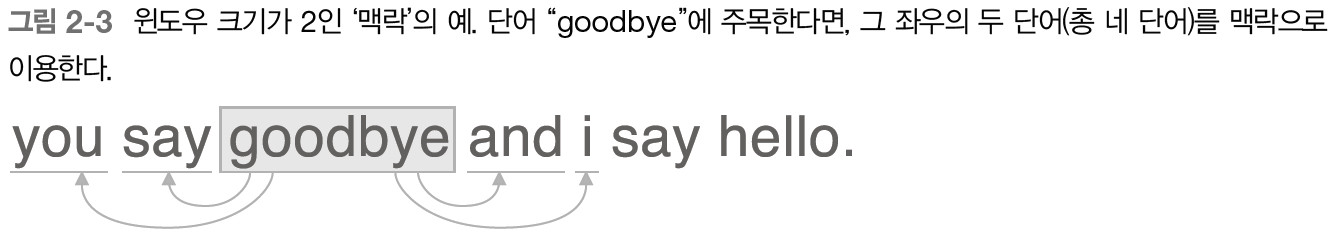

In [10]:
Image.open('C:\\Users\\AAA\\self_study\\deep_learning_from_scratch\\book_2\\images\\fig 2-3.png')

위의 그림같이 '맥락'이란 특정 단어를 중심에 둔 주변 단어를 의미함.

$\text{윈도우 크기}^{\text{window size}}$ : 맥락의 크기(상황에 따라 양옆 모두 고려할 수도, 왼쪽 혹은 오른쪽만, 아니면 문장의 시작과 끝만 고려할 수 있음)

### 2.3.4 동시발생 행렬

'$\textbf{통계 기반}^{\text{statistical based}}$ 기법' : 어떤 단어에 주목했을 때, 그 주변에 어떤 단어가 몇 번이나 등장하는지를 측정해서 집계하는 방법

통계 기반 기법 예제

In [11]:
import sys
sys.path.append('..')
import numpy as np
from common.util import preprocess

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)

print(corpus)
print(id_to_word)

[0 1 2 3 4 1 5 6]
{0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '.'}


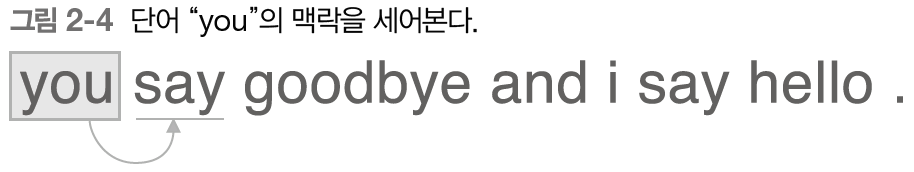

In [12]:
Image.open('C:\\Users\\AAA\\self_study\\deep_learning_from_scratch\\book_2\\images\\fig 2-4.png')

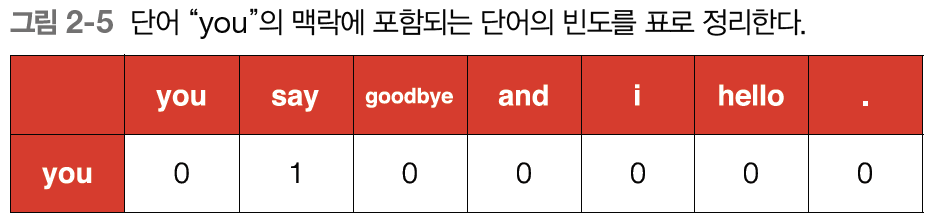

In [13]:
Image.open('C:\\Users\\AAA\\self_study\\deep_learning_from_scratch\\book_2\\images\\fig 2-5.png')

단어 'you'의 맥락에서 발생하는 단어의 빈도를 [그림 2-5]와 같이 벡터 형태로 표현할 수 있다.

ID가 1인 'say'에 대해서도 같은 작업을 수행하면 다음과 같다.

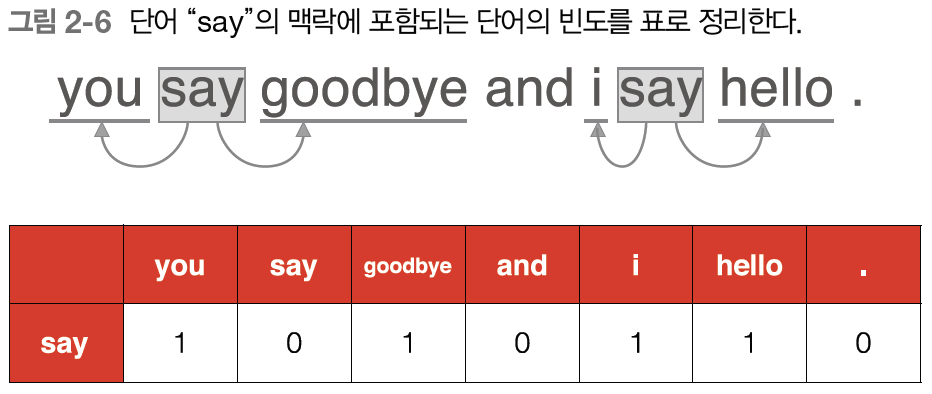

In [14]:
Image.open('C:\\Users\\AAA\\self_study\\deep_learning_from_scratch\\book_2\\images\\fig 2-6.png')

이상의 작업을 모든 단어에 대해서 수행한 결과는 다음과 같다.

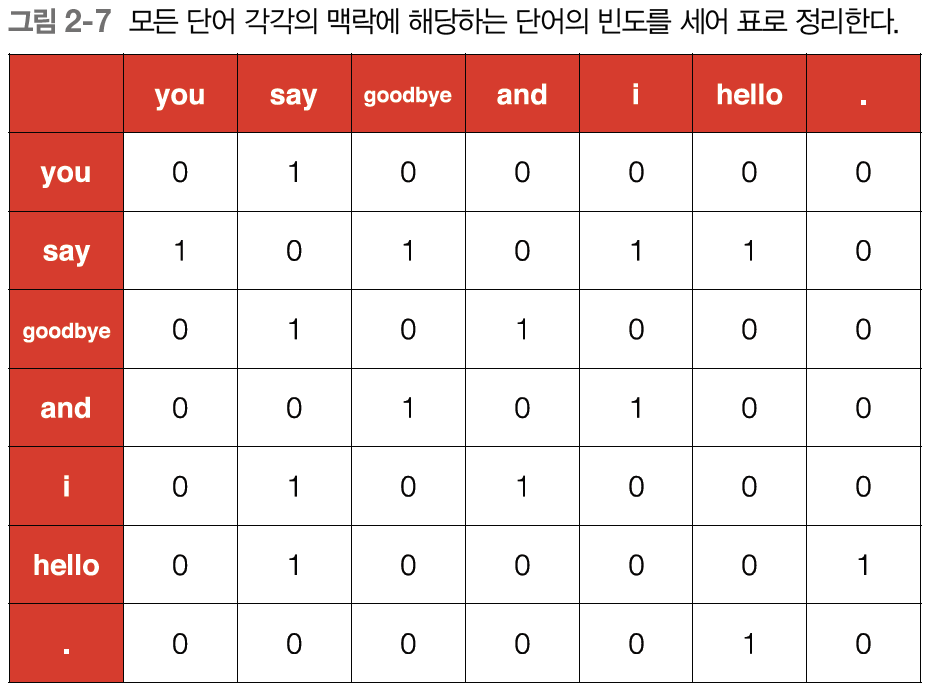

In [15]:
Image.open('C:\\Users\\AAA\\self_study\\deep_learning_from_scratch\\book_2\\images\\fig 2-7.png')

$\textbf{동시발생 행렬}^{\text{co-occurence matrix}}$ : 모든 단어에 대해 동시발생하는 단어를 행렬 형태로 정리한 것.

이러한 동시발생 행렬을 활용하면 단어를 벡터로 나타낼 수 있다. 수동으로 만들 수도 있지만, 자동화도 가능하다.

말뭉치로부터 동시발생 행렬을 만들어주는 함수를 구현한다.

`create_co_matrix(corpus, vocab_size, window_size = 1)` : common/util.py

이 함수는 먼저 `co_matrix`를 0으로 채워진 2차원 배열로 초기화한다. 

그 다음 말뭉치에 등록된 모든 단어 각각에 대해서 윈도우에 포함된 주변 단어를 세어나간다.

이때 말뭉치의 왼쪽 끝과 오른쪽 끝 경계를 벗어나지 않는 경우에 대해서만 센다. (`if left_idx >= 0:`, `if right_idx < corpus_size:`)

앞으로 말뭉치의 동시발생 행렬을 만드는 경우 항상 이 함수를 사용하도록 한다.

### 2.3.5 벡터 간 유사도

벡터 사이의 유사도를 측정하는 방법은 다양하다. 대표적으로 벡터의 내적이나 유클리드 거리등이 있다.

$\textbf{코사인 유사도}^{\text{cosine similarity}}$ : 단어 벡터의 유사도를 나타낼 때 자주 쓰이는 방법.

두 벡터 $\mathbf{x} = (x_1, x_2, \ldots, x_n)$ 과 $\mathbf{y} = (y_1, y_2, \ldots, y_n)$ 이 주어졌을 때, 코사인 유사도는 다음과 같이 정의한다.

\begin{equation*}
    \text{similarity}(\mathbf{x}, \mathbf{y}) = \cfrac{\mathbf{x} \cdot \mathbf{y}}{|| \mathbf{x} || || \mathbf{y} ||} = \cfrac{x_1 y_1 + \cdots + x_n y_n}{\sqrt{x^{2}_1 + \cdots + x^{2}_n} \sqrt{y^{2}_1 + \cdots + y^{2}_n}}
    \tag{2.1}
\end{equation*}

위 식의 핵심은 벡터를 정규화하고 내적을 구하는 것이다.

코사인 유사도를 직관적으로 풀면 '두 벡터가 가리키는 방향이 얼마나 비슷한가'이다.

두 벡터의 방향이 완전히 같다면 코사인 유사도가 1이 되며, 정반대라면 -1이 된다.

이러한 코사인 유사도를 파이썬 함수로 구현할 수 있다. (common/util.py)

단어 벡터의 유사도 예제 : ch02/similarity.py

실행 결과 "you"와 "i"의 코사인 유사도는 0.70... 으로 나왔다. 이 값은 비교적 높다(유사성이 크다)고 할 수 있다.

### 2.3.6 유사 단어의 랭킹 표시

`most_similar()` : 어떤 단어가 검색어로 주어지면, 그 검색어와 비슷한 단어를 유사도 순으로 출력하는 함수

common/util.py 참조

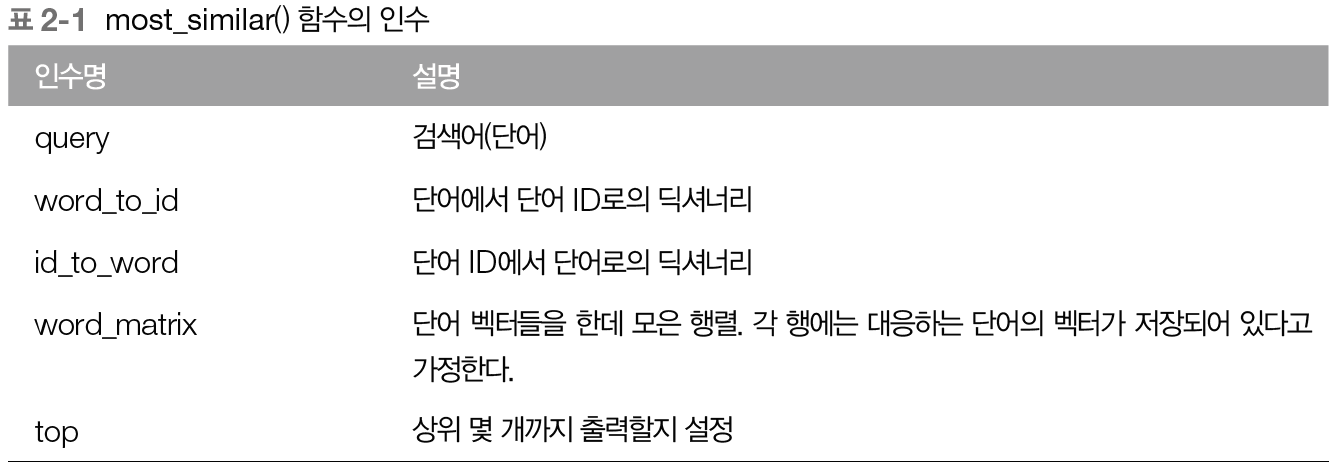

In [16]:
Image.open('C:\\Users\\AAA\\self_study\\deep_learning_from_scratch\\book_2\\images\\table 2-1.png')

`most_similar()` 함수에서는 similarity 배열에 담긴 원소의 인덱스를 내림차순으로 정렬한 뒤 상위 원소들을 출력한다.

이때 배열 인덱스의 정렬을 바꾸는 데 사용한 `argsort()` 메서드는 넘파이 배열의 원소를 오름차순으로 정렬한다(반환값은 배열의 인덱스이다).

In [17]:
x = np.array([100, -20, 2])
x.argsort()

array([1, 2, 0], dtype=int64)

원래 목적은 단어의 유사도가 '큰' 순서로 정렬하는 것이기에, 넘파이 배열의 각 원소에 마이너스를 곱한 후 `argsort()` 메서드를 호출하면 원하는 결과를 얻을 수 있다.

In [18]:
(-x).argsort()

array([0, 2, 1], dtype=int64)

이와 같이 `argsort()` 를 사용하면 단어의 유사도가 높은 순서로 출력할 수 있다.

"you"를 검색어로 지정해서 유사한 단어들을 출력하는 예제 : ch02/most_similar.py

지금까지 본 것처럼 동시발생 행렬을 이용하면 단어를 벡터로 표현할 수 있다.

## 2.4 통계 기반 기법 개선하기

앞서 단어의 동시발생 행렬을 만들었다.

이를 이용해 단어를 벡터로 표현하는 데는 성공했으나, 아직 동시발생 행렬에는 개선해야 할 점이 남아있다.

이번 절에서는 이 개선 작업을 해보고자 한다. 이를 통해 더 실용적인 말뭉치를 사용하여 '진짜' 단어의 분산 표현을 얻고자 한다.

### 2.4.1 상호정보량

앞선 동시발생 행렬의 원소는 두 단어가 동시에 발생한 횟수를 나타낸다. (윈도우 기준)

그러나 이 '발생' 횟수는 사실 그리 좋은 특징이 아니다.

"...the car..." 에서 동시발생횟수 기준으로는 "the"가 "drive"보다 "car"와 더 관련이 깊다는 결론이 나온다.

문제점 해결 방법 $\rightarrow$ $\textbf{점별 상호정보량}^{\text{Pointwise Mutual Information}}$(PMI)

PMI는 확률 변수 x와 y에 대해서 다음 식으로 정의된다.

\begin{equation*}
    \text{PMI}(x,y) = \log_{2} \cfrac{P(x,y)}{P(x)P(y)}
    \tag{2.2}
\end{equation*}

여기서 $P(x)$는 $x$가 일어날 확률, $P(y)$는 $y$가 일어날 확률, $P(x,y)$는 $x,y$가 동시에 일어날 확률을 뜻한다.

이 PMI 값이 높을수록 $x$와 $y$간에 관련성이 높다는 뜻이다.

자연어에 대해 적용할 경우 다음과 같이 이해할 수 있다. 10,000개의 단어로 이뤄진 말뭉치에서,

1. $P(x)$ : 단어 $x$가 말뭉치에 등장할 확률. 말뭉치에서 "the"가 100번 등장하면 $P(``\text{the}") = \tfrac{100}{10,000} = 0.01$.

2. $P(x,y)$ : 단어 $x,y$가 말뭉치에 동시발생할 확률. 말뭉치에서 "the"와 "car"가 10번 동시발생하면 $P(``\text{the}", ``\text{car}") = \tfrac{10}{10,000} = 0.001$.

동시발생 행렬을 활용해서 식 (2.2) 다시 쓰기

- $C$ : 동시발생 행렬
- $C(x,y)$ : 단어 $x$와 $y$가 동시발생하는 횟수
- $C(x)$, $C(y)$ : 각각 단어 $x$와 $y$의 등장 횟수

\begin{equation*}
    \text{PMI}(x,y) = \log_{2} \cfrac{P(x,y)}{P(x)P(y)} = \log_{2} \cfrac{\cfrac{C(x,y)}{N}}{\cfrac{C(x)}{N} \cfrac{C(y)}{N}} = \log_{2} \cfrac{C(x,y) \cdot N}{C(x) C(y)}
    \tag{2.3}
\end{equation*}

In [19]:
## PMI 예제
def PMI(word1, word2, PMI_ex, N : int):
    Cx = PMI_ex[word1]
    Cy = PMI_ex[word2]
    Cxy = PMI_ex[word1 + "_" + word2]
    return np.log2(N * Cxy / (Cx * Cy))

PMI_ex = {"the" : 1000, "car" : 20, "drive" : 10, "the_car" : 10, "car_drive" : 5}
N = 10000

print("\'the\' \'car\' PMI :", PMI("the", "car", PMI_ex, N))
print("\'car\' \'drive\' PMI :", PMI("car", "drive", PMI_ex, N))


'the' 'car' PMI : 2.321928094887362
'car' 'drive' PMI : 7.965784284662087


위의 예에서 알 수 있듯이 PMI를 이용하면 'car'는 'the'보다 'drive'와의 관련성이 강해진다.

이러한 결과가 나온 이유는 단어가 단독으로 출현하는 횟수가 고려되었기 때문이다.

이 예제의 경우 'the'가 자주 출현했으므로 PMI 점수가 낮아진 것이다.

PMI는 굉장히 좋은 성질을 지녔으나, 한 가지 문제점이 있다.

두 단어의 동시발생 횟수가 0이 되면 $\log_{2} = -\infty$ 가 되기에, PMI 점수 계산이 불가능해진다.

이 문제를 피하기 위해 실제 구현에서는 $\textbf{양의 상호정보량}^{\text{positive PMI}}(\textbf{PPMI})$ 을 사용한다.

\begin{equation*}
    \text{PPMI}(x,y) = \max (0, \text{PMI}(x,y))
    \tag{2.4}
\end{equation*}

이 식을 사용하게 되면 PMI가 음수일 때는 0으로 취급할 수 있다.

즉 단어 사이의 관련성을 0 이상의 실수로 나타낼 수 있다.

동시발생 행렬을 PPMI 행렬로 변환하는 함수 `ppmi(C, verbose = False, eps = 1e-8)`는 common/util.py 를 참조

이 함수에서 인수 `C`는 동시발생 행렬, `verbose` 는 진행상황 출력 여부를 결정하는 플래그이다.

큰 말뭉치를 다룰 때 `verbose = True`로 설정하면 중간중간 진행 상황을 알려준다.

참고로, `ppmi()`는 동시발생 행렬에 대해서만 PPMI 행렬을 구할 수 있도록 단순화한 구현이다.

구체적으로, 단어 $x$ 와 단어 $y$ 가 동시에 발생하는 횟수를 $C(x,y)$ 라고 하면

\begin{equation*}
    C(x) = \displaystyle\sum_{i}^{}C(i,x), \quad C(y) = \displaystyle\sum_{i}^{}C(i,y), \quad N = \displaystyle\sum_{i}^{} \displaystyle\sum_{j}^{} C(i,j)
\end{equation*}

이다. 매우 단순한 구현으로, 중복되는 계산을 하게된다. (`ppmi_optimized`는 이를 보완함)

동시발생 행렬을 PPMI 행렬로 변환하는 예제 : chapter02/ppmi.py

이상으로 동시발생 행렬을 PPMI 행렬로 변환하는 법을 알아보았다.

이때 PPMI 행렬의 각 원소는 0 이상의 실수이다.

그러나 PPMI 행렬에는 말뭉치의 어휘 수에 비례해서 각 단어 벡터의 차원 수가 증가한다는 큰 단점이 존재한다.

예를 들어 말뭉치의 어휘 수가 10만개이면 그 벡터의 차원 수도 똑같이 10만이 된다.

또한, PPMI 행렬이나 동시발생 행렬의 원소는 대부분 그 값이 0임을 알 수 있다.

벡터의 원소 대부분이 중요하지 않다는 뜻이다(각 원소의 '중요도'가 낮다).

이런 벡터는 노이즈에 약하고 견고하지 못하다는 약점도 있다.

이러한 문제에 대한 해소법으로 벡터의 차원 감소가 있다.

### 2.4.2 차원 감소

$\textbf{차원 감소}^{\text{dimensionality reduction}}$ : 벡터의 차원을 줄이는 방법. '중요한 정보'는 최대한 유지하면서 줄이는 게 핵심

다음 그림처럼 데이터의 분포를 고려해서 중요한 '축'을 찾는 일을 수행함.

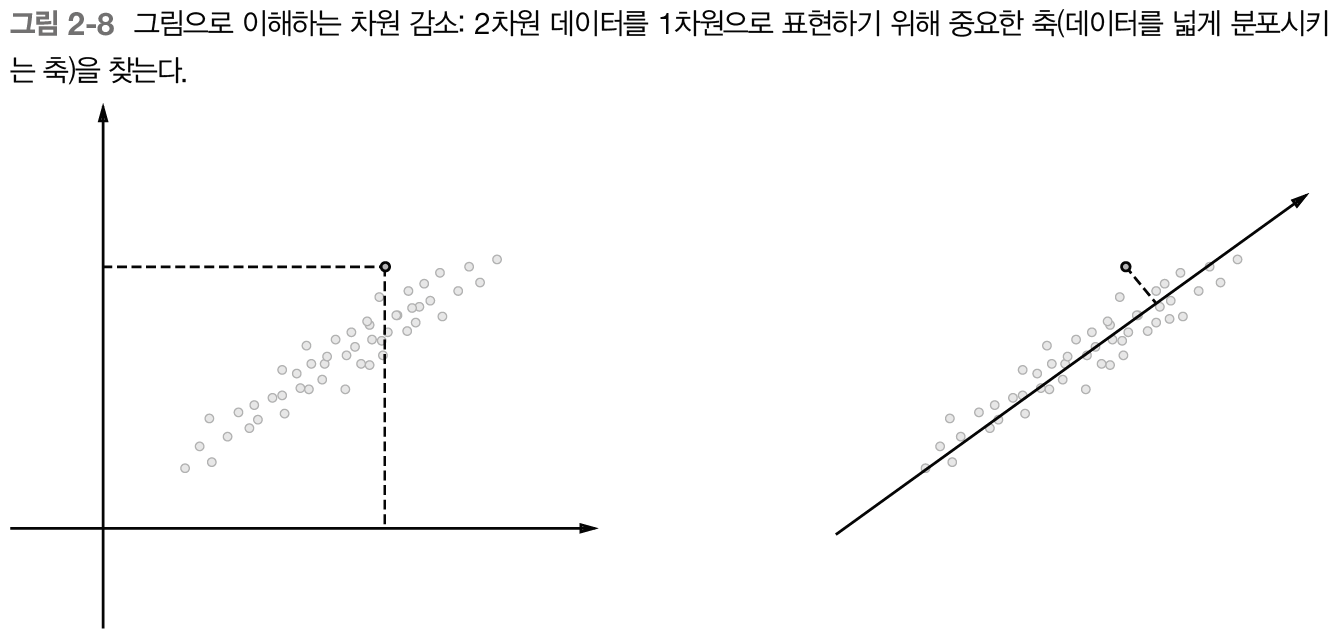

In [20]:
Image.open('C:\\Users\\AAA\\self_study\\deep_learning_from_scratch\\book_2\\images\\fig 2-8.png')

$\textbf{NOTE}$

원소 대부분이 0인 행렬 또는 벡터를 $\text{희소 행렬}^{\text{sparse matrix}}$ 또는 $\text{희소 벡터}^{\text{sparse vector}}$ 라고 한다. 차원 감소의 핵심은 희소벡터에서 중요한 축을 찾아내어 더 적은 차원으로 다시 표현하는 것이다. 차원 감소의 결과로 원래의 희소벡터는 원소 대부분이 0이 아닌 값으로 구성된 '밀집 벡터'로 변환된다. 이 조밀한 벡터가 우리가 원하는 단어의 분산 표현이 되는 것이다.

차원을 감소시키는 방법은 다양하다. 여기서는 그중 SVD를 활용하고자 한다.

$\textbf{특잇값 분해}^{\text{Singular Value Decomposition}} (\textbf{SVD})$ : 임의의 행렬을 세 행렬의 곱으로 분해

\begin{equation*}
    \mathbf{X} = \mathbf{U} \mathbf{S} \mathbf{V}^{\top}
    \tag{2.5}
\end{equation*}

$\mathbf{U}$ 와 $\mathbf{V}$ 는 직교행렬(orthogonal matrix)이고, 그 열벡터는 서로 직교한다.

$\mathbf{S}$ 는 대각행렬(diagonal matrix)로, 대각성분 외에는 전부 0인 행렬이다.

이를 다음 그림처럼 표현할 수 있다.

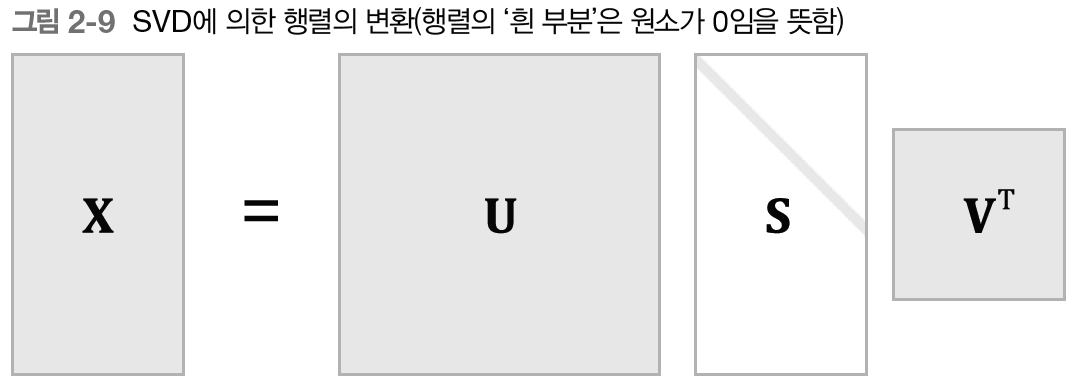

In [21]:
Image.open('C:\\Users\\AAA\\self_study\\deep_learning_from_scratch\\book_2\\images\\fig 2-9.png')

$\mathbf{U}$ 는 직교행렬이며, 어떠한 공간의 축(기저)을 형성한다. 우리의 맥ㄺ에서 이 $\mathbf{U}$ 를 '단어 공간'으로 취급할 수 있다.

$\mathbf{S}$ 는 대각행렬로, 대각성분에는 '특잇값(singular value)'가 큰 순서로 나열되어 있다. 특잇값은 쉽게 말해 '해당 축'의 중요도라고 볼 수 있다.

그래서 다음 그림과 같이 중요도가 낮은 원소를 깎아내는 방법을 생각할 수 있다.

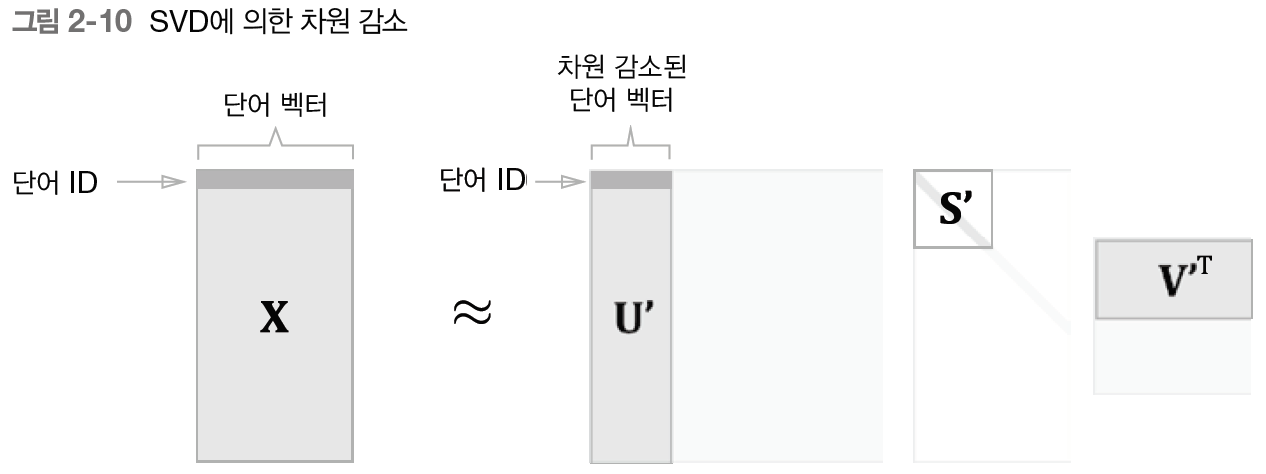

In [23]:
Image.open('C:\\Users\\AAA\\self_study\\deep_learning_from_scratch\\book_2\\images\\fig 2-10.png')

이를 '단어의 PPMI 행렬'에 적용해보면 다음과 같다.

행렬 $\mathbf{X}$ 의 각 행에는 해당 단어 ID의 단어 벡터가 저장되어 있다.

이 단어 벡터가 행렬 $\mathbf{U}'$의 벡터 (차원 감소된)로 표현되는 것이다.

### 2.4.3 SVD에 의한 차원 감소

이제 SVD를 파이썬 코드로 살펴본다. (chapter02/count_method_small.py)

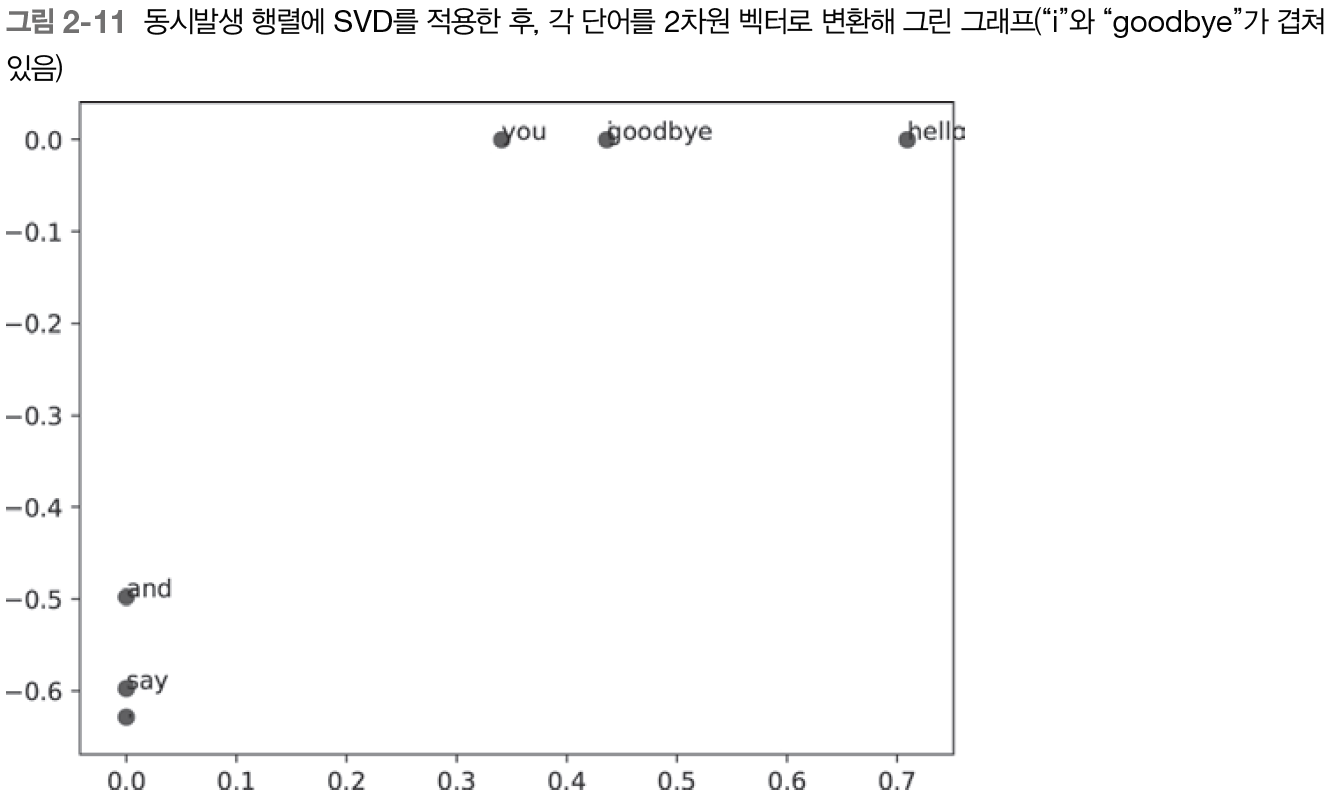

In [24]:
Image.open('C:\\Users\\AAA\\self_study\\deep_learning_from_scratch\\book_2\\images\\fig 2-11.png')

그림을 보면 "goodbye"와 "hello", "you"와 "i" 가 제법 가까이 있음을 알 수 있다. 우리의 직관과 비교적 비슷하다.

하지만 지금 사용한 말뭉치는 너무 작아서 이 결과를 그대로 받아들이기는 쉽지 않다.

계속해서 PTB 데이터셋이라는 더 큰 말뭉치를 사용해서 똑같은 실험을 수행해본다.

$\textbf{WARNING}$

행렬의 크기가 $N$ 이면 SVD 계산은 $O(N^{3})$ 이 걸린다. 계산량이 $N$ 의 세제곱에 비례해 늘어나는 것이다. 이는 현실적으로 감당하기 어려운 수준이므로 Truncated SVD 같은 더 빠른 기법을 이용한다. Truncated SVD 는 특잇값이 작은 것은 버리는(truncate) 방식으로 성능 향상을 꾀한다. 다음 절에서는 사이킷런 라이브러리의 Truncated SVD를 사용해본다.

### 2.4.4 PTB 데이터셋

$\textbf{펜 트리뱅크}^{\text{Penn Treebank}} \textbf{(PTB)}$ : 주어진 깁버의 품질을 측정하는 벤치마크로 자주 사용됨. word2vev의 발명자 $\text{토마스 미콜로프}^{\text{Tomas Mikolov}}$의 웹페이지에서 다운가능.

이 PTB 말뭉치는 텍스트 파일로 제공되며, 원래의 PTB 문장에 몇 가지 전처리가 적용됨:
1. 희소한 단어는 \<unk\> 라는 특수 문자로 치환
2. 구체적인 숫자는 $N$ 으로 대체

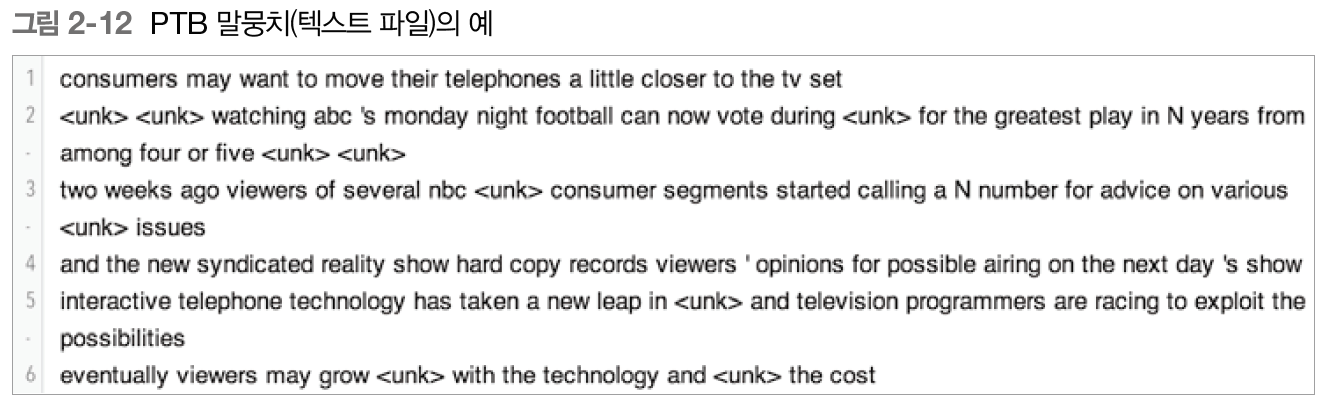

In [25]:
Image.open('C:\\Users\\AAA\\self_study\\deep_learning_from_scratch\\book_2\\images\\fig 2-12.png')

위 그림에서 보듯 PTB 말뭉치에서는 한 문장이 하나의 줄로 저장되어 있다.

이 책에서는 각 문장을 연결한 '하나의 큰 시계열 데이터'로 취급한다.

이때 각 문장 끝에 \<eos\> 라는 특수 문자를 삽입한다. (end of sentence)

$\textbf{WARNING}$

이 책에서는 문장의 구분을 고려하지 않고, 여러 문장을 연결한 '하나의 큰 시계열 데이터'로 간주한다. 물론 문장 단위로 처리할 수도 있지만(단어의 빈도를 문장 단위로 계산), 이 책에서는 원리를 간단히 보여주고자 문장 단위 처리는 수행하지 않는다.

코드 참조 : chapter02/show_ptb.py

### PTB 데이터셋 평가

PTB 데이터셋에 통계 기반 기법을 적용해본다. 

이번에는 큰 행렬에 SVD를 적용해야 하므로 고속 SVD 사용이 추천된다. (사이킷런 SVD)

코드 참조 : chapter02/count_method_big.py

이 코드는 SVD를 수행하는 데 `sklearn`의 `randomized_svd()` 메서드를 이용한다.

이 메서드는 무작위 수를 사용한 Truncated SVD로, 특잇값이 큰 것들만 계산해서 기본적인 SVD보다 훨씬 빠르다.

코드 실행 결과는 다음과 같다.

```
PPMI Elapsed time : 149.86745882034302

PPMI optimized Elapsed time : 87.20108294487

truncated SVD Elapsed time : 3.9144155979156494

[query] you
 i: 0.6775246858596802
 we: 0.6271072626113892
 do: 0.5431938171386719
 'll: 0.5251158475875854
 'd: 0.5054776668548584

[query] year
 month: 0.6762107610702515
 last: 0.6300910711288452
 quarter: 0.6195750832557678
 earlier: 0.6186304092407227
 next: 0.580223798751831

[query] car
 auto: 0.5980502367019653
 vehicle: 0.5764117240905762
 cars: 0.5004873275756836
 luxury: 0.49843597412109375
 domestic: 0.47828686237335205

[query] toyota
 motor: 0.7224788665771484
 nissan: 0.7039012908935547
 honda: 0.6571176052093506
 mazda: 0.6517155766487122
 lexus: 0.629157304763794
```

이처럼 단어의 의미 혹은 문법적인 관점에서 비슷한 단어들이 가까운 벡터로 나타났음을 알 수 있다.

정리하면, 말뭉치를 사용해서 맥락에 속한 단어의 등장 횟수를 센 후, PPMI 행렬로 변환,

다시 SVD를 이용해 차원을 감소시킴으로써 더 좋은 단어 벡터를 얻어냈다.

이것이 단어의 분산 표현이고, 각 단어는 고정 길이의 밀집벡터로 표현되었다.

## 2.5 정리

$\textbf{이번 장에서 배운 내용}$
- WordNet 등의 시소러스를 이용하면 유의어를 얻거나 단어 사이의 유사도를 측정하는 등 유용한 작업을 할 수 있다.
- 시소러스 기반 기법은 시소러스를 작성하는 데 엄청난 인적 자원이 든다거나 새로운 단어에 대응하기 어렵다는 단점이 있다.
- 현재는 말뭉치를 이용해 단어를 벡터화하는 방식이 주로 쓰인다.
- 최근의 단어 벡터화 기법들은 대부분 '단어의 의미는 주변 단어에 의해 형성된다'는 분포 가설에 기초한다.
- 통계 기반 기법은 말뭉치 안의 각 단어에 대해서 그 단어의 주변 단어의 빈도를 집계한다(동시발생 행렬).
- 동시발생 행렬을 PPMI 행렬로 변환하고 다시 차원을 감소시킴으로써, 거대한 '희소벡터'를 작은 '밀집벡터'로 변환할 수 있다.
- 단어의 벡터 공간에서는 의미가 가까운 단어는 그 거리도 가까울 것으로 기대된다.